# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

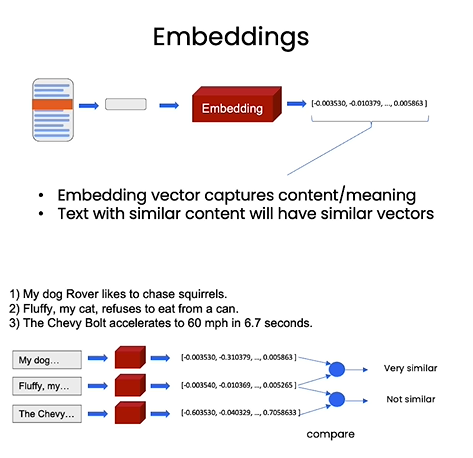

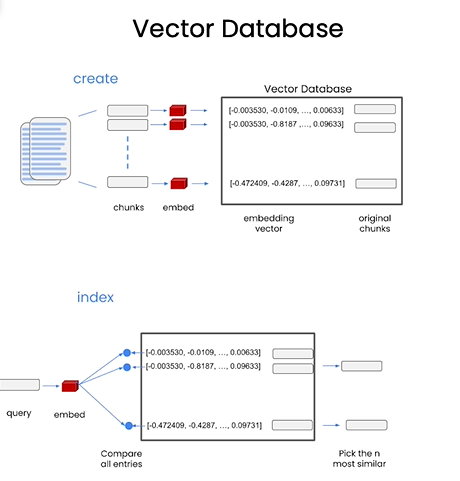

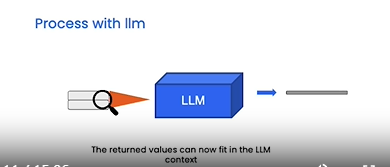

In [ ]:
#pip install --upgrade langchain

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

In [ ]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [ ]:
from langchain.indexes import VectorstoreIndexCreator

In [ ]:
#pip install docarray

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

In [ ]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [ ]:
response = index.query(query)

In [ ]:
display(Markdown(response))

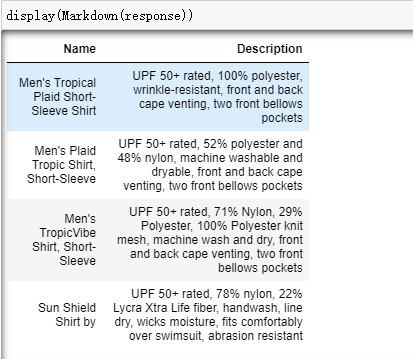

In [ ]:
loader = CSVLoader(file_path=file)

In [ ]:
docs = loader.load()

In [ ]:
docs[0]

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [ ]:
embed = embeddings.embed_query("Hi my name is Harrison")

In [ ]:
print(len(embed))

In [ ]:
print(embed[:5])

### Method 1, use embedding similarity search

In [ ]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [ ]:
query = "Please suggest a shirt with sunblocking"

In [ ]:
docs = db.similarity_search(query)

In [ ]:
len(docs)

In [ ]:
docs[0]

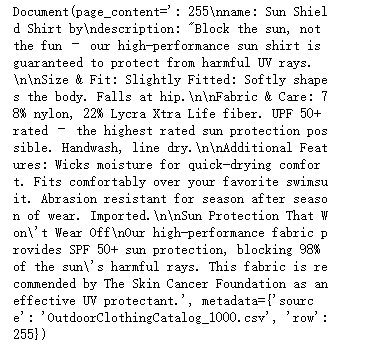

In [ ]:
retriever = db.as_retriever()

In [ ]:
llm = ChatOpenAI(temperature = 0.0)


In [ ]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [ ]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.") 


In [ ]:
display(Markdown(response))

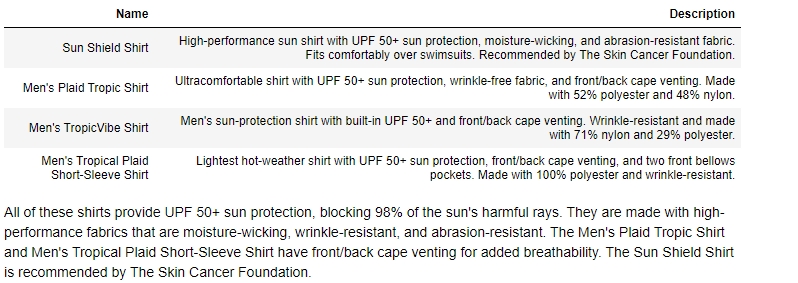

### Method 2, use RetrievalQA

In [ ]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)
## chain_type="stuff" is the most simple one, ## Stuff all documents together and give to the LLM, you can choose others

In [ ]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [ ]:
response = qa_stuff.run(query)

In [ ]:
display(Markdown(response))

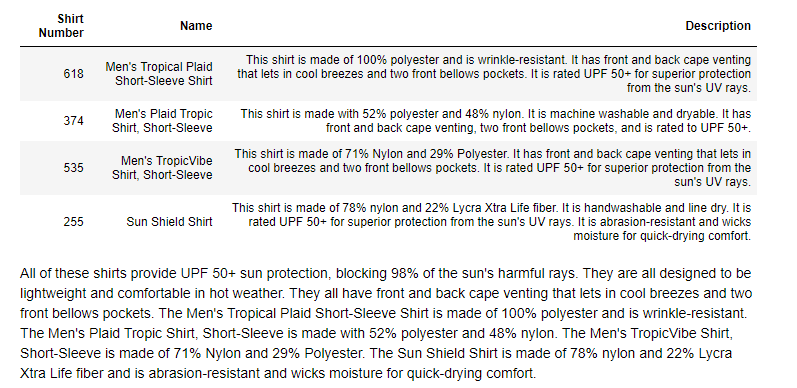

### Method 3, use oneline index.query instead of doing five steps in Method 1

In [ ]:
response = index.query(query, llm=llm)

In [ ]:
### You can also customize you embedding to make an index
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

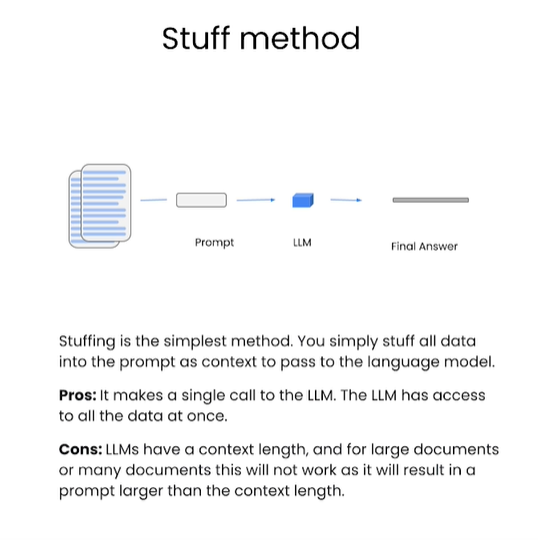

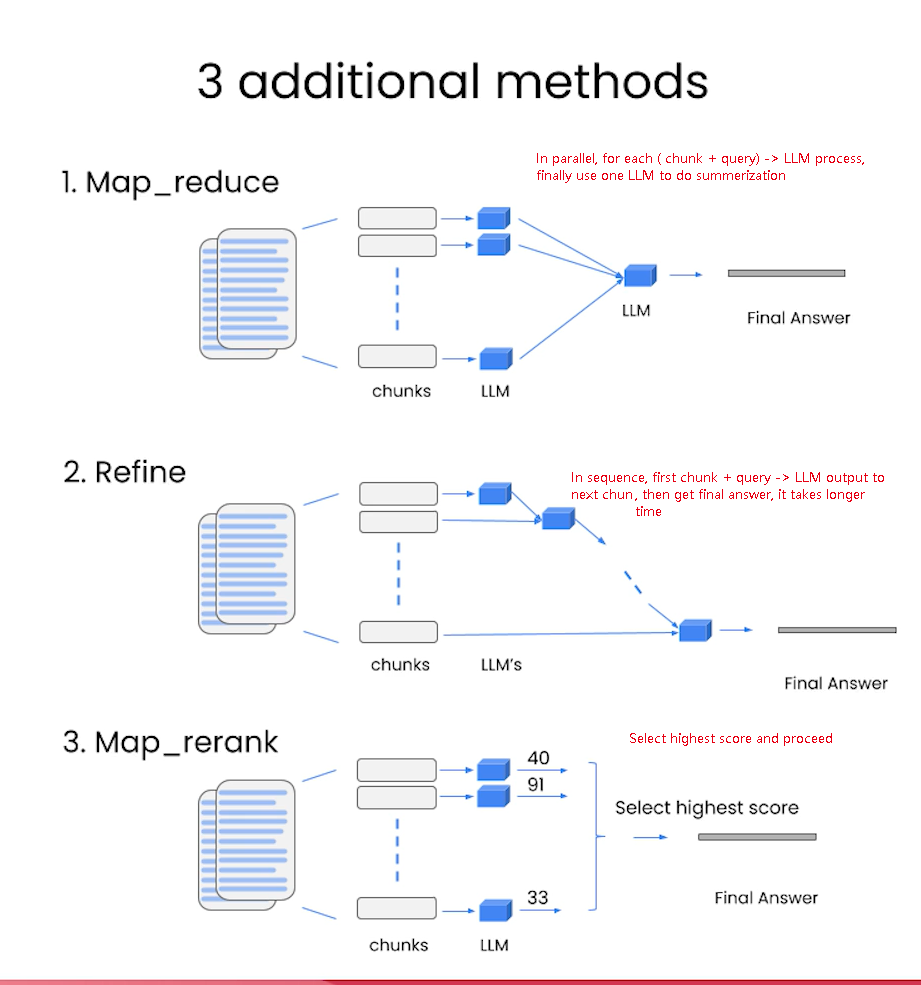